# Nested CV: Pearson r per fold

This notebook loads `outputs/nested_cv/nested_cv_metrics.json` and visualizes the per-fold Pearson correlation as a boxplot.

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

metrics_path = Path('outputs/nested_cv/nested_cv_metrics.json')
if not metrics_path.exists():
    raise FileNotFoundError(f'Could not find metrics file: {metrics_path}')

with open(metrics_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

per_fold = data.get('per_fold', [])
if not per_fold:
    raise ValueError('No per_fold metrics found in the metrics file.')

df = pd.DataFrame(per_fold)
# Ensure correct dtypes
df['fold'] = df['fold'].astype(int)
df['pearson_r'] = df['pearson_r'].astype(float)

overall = data.get('overall', {}).get('pearson_r', None)
df.head()

,fold,pearson_r
0,1,0.276077
1,2,0.333395
2,3,0.343944
3,4,0.292062
4,5,0.266677


C:\Users\Simen\AppData\Local\Temp\ipykernel_41232\1197388862.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(vals, vert=True, labels=[''])


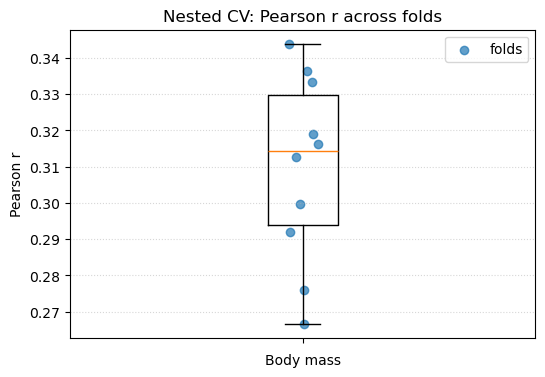

In [9]:
# Boxplot of Pearson r across folds, with individual points overlaid
vals = df['pearson_r'].values
plt.figure(figsize=(6, 4))
plt.boxplot(vals, vert=True, labels=[''])
# jittered scatter overlay for individual fold values
x = np.random.normal(loc=1, scale=0.03, size=len(vals))
plt.scatter(x, vals, alpha=0.7, label='folds')

#if overall is not None:
    #plt.axhline(overall, color='red', linestyle='--', linewidth=1.5, label=f'overall r = {overall:.3f}')

plt.ylabel('Pearson r')
plt.xlabel('Body mass')
plt.title('Nested CV: Pearson r across folds')
plt.legend(loc='best')
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.show()